# Learning Objectives

Today we learn how to clean real data and use summary statistics to answer real world questions about the dataset

## Practicals

This is a series that can be watched to reinforce the material of data science foundations, and while I will try to make it as stand alone as possible, it will heavily lean on the foundations material.

The point of these lectures will be to dive into how to use the knowledge we gained during data science fundamentals. 

## What we know so far

As always we will start off by checking out our assumptions. In the data science foundations we will discuss why we need these assumptions and what we can use them for in theory, but here we will use them in practice.

The assumptions that we begin with are simply: we have data.

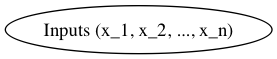

In [7]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

G = nx.DiGraph()
G.add_node('Inputs (x_1, x_2, ..., x_n)')
draw(G)

## Our data

The data that we will be looking at throughout this series will be the billionaires dataset ([full details](http://www.iie.com/publications/interstitial.cfm?ResearchID=2917))

Researchers have compiled a multi-decade database of the super-rich. Building off the Forbes World's Billionaires lists from 1996-2014, scholars at Peterson Institute for International Economics have added a couple dozen more variables about each billionaire - including whether they were self-made or inherited their wealth.

While we could focus on more than one data set and have quite some fun doing so, we will focus on just one to drill down instead on the methodology and the practice of data science. So let's begin by looking at our data.

In [6]:
import pandas as pd

# Pandas has many different wrappers to read data
# But read_csv tends to be the most commonly used one
df = pd.read_csv('../data/billionaires.csv')

# The first thing I always do it do .info()
df.info()
#dots in colum names, spaces, some missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
age                  2614 non-null int64
category             2613 non-null object
citizenship          2614 non-null object
company.name         2576 non-null object
company.type         2578 non-null object
country code         2614 non-null object
founded              2614 non-null int64
from emerging        2614 non-null bool
gdp                  2614 non-null float64
gender               2580 non-null object
industry             2613 non-null object
inherited            2614 non-null bool
name                 2614 non-null object
rank                 2614 non-null int64
region               2614 non-null object
relationship         2568 non-null object
sector               2591 non-null object
was founder          2614 non-null bool
was political        2614 non-null bool
wealth.type          2592 non-null object
worth in billions    2614 non-null float64
year                

So here we get a ton of information. We have a data set with 22 columns and up to 2614 rows. Notice that some columns don't have 2614 rows filled rows and instead have some null rows. In addition we can get the types of the rows.

## Quantitative and Qualitative

We can see from above which columns are quantitative and qualitative. A good rule of thumb is that any float is a quantitative column and the rest are qualitative.

That being said it is good to inspect the columns and ask the question: can I average this. A quick visual inspection using `.head()` can help:

In [7]:
df.head(2)

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year
0,-1,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968,True,1.580000e+11,male,...,Abdul Aziz Al-Sulaiman,404,Middle East/North Africa,founder,construction,True,False,self-made finance,1.0,1996
1,34,Financial,United States,Fidelity Investments,new,USA,1946,True,8.100000e+12,female,...,Abigail Johnson,145,North America,relation,investment banking,True,False,inherited,2.5,1996


## Describing qualitative features

We can't do too much to describe qualitative features, but one thing that we can do is to count and display the unique entries of these columns. For example, you could be interested in how most billionaires made their fortunes, the below command can tease this out (this will even give us the mode):

In [8]:
df.groupby('wealth.type').sector.count()

wealth.type
executive                   188
founder non-finance         713
inherited                   950
privatized and resources    235
self-made finance           499
Name: sector, dtype: int64

For an ordered qualitative column (like year) we can even take the median or the max and min:

In [9]:
print df.year.min()
print df.year.median()
print df.year.max()

SyntaxError: invalid syntax (<ipython-input-9-a49b984a203e>, line 1)

## Describing quantitative features

Now when it comes to describing quantitative features we have much more we can do, but generally it is always good to start off with a `.describe()` command:

In [10]:
df.describe()

,age,founded,gdp,rank,worth in billions,year
count,2614.000000,2614.000000,2.614000e+03,2614.000000,2614.000000,2614.000000
mean,53.212701,1924.711936,1.769103e+12,599.672533,3.531943,2008.411630
std,25.591642,243.776546,3.547083e+12,467.885695,5.088813,7.483598
min,-1.000000,0.000000,0.000000e+00,1.000000,1.000000,1996.000000
25%,47.000000,1936.000000,0.000000e+00,215.000000,1.400000,2001.000000
50%,59.000000,1963.000000,0.000000e+00,430.000000,2.000000,2014.000000
75%,70.000000,1985.000000,7.250000e+11,988.000000,3.500000,2014.000000
max,98.000000,2012.000000,1.060000e+13,1565.000000,76.000000,2014.000000


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,2614,NaN,NaN,NaN,53.2127,25.5916,-1,47,59,70,98
category,2613,9,Financial,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citizenship,2614,73,United States,903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company.name,2576,1577,Walmart,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company.type,2578,18,new,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country code,2614,74,USA,903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,2614,NaN,NaN,NaN,1924.71,243.777,0,1936,1963,1985,2012
from emerging,2614,1,True,2614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gdp,2614,NaN,NaN,NaN,1.7691e+12,3.54708e+12,0,0,0,7.25e+11,1.06e+13
gender,2580,3,male,2328,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This will take all of the numeric features (even those that are not actually quantitative like rank) and calculate some very relevant summary statistics. We get to see the worth in billions, its max, min, percentiles, mean and standard deviation. And with this information we can get a good understanding of how our data is distributed.

We also get to see parts of the data we should mung, specifically age that has values less than 1 (thus the mean age biased). Or founded or gdp that has values of 0. 

So let's clean the data and do this one more time.

In [12]:
import numpy as np

df.age.replace(-1, np.NaN, inplace=True)
df.founded.replace(0, np.NaN, inplace=True)
df.gdp.replace(0, np.NaN, inplace=True)

df.describe()

,age,founded,gdp,rank,worth in billions,year
count,2229.000000,2574.000000,9.490000e+02,2614.000000,2614.000000,2614.000000
mean,62.576492,1954.621989,4.872956e+12,599.672533,3.531943,2008.411630
std,13.134715,43.189003,4.420257e+12,467.885695,5.088813,7.483598
min,12.000000,1610.000000,2.491801e+09,1.000000,1.000000,1996.000000
25%,53.000000,1938.250000,3.970000e+11,215.000000,1.400000,2001.000000
50%,62.000000,1963.000000,2.500000e+12,430.000000,2.000000,2014.000000
75%,72.000000,1985.000000,1.060000e+13,988.000000,3.500000,2014.000000
max,98.000000,2012.000000,1.060000e+13,1565.000000,76.000000,2014.000000


In [15]:
df.gender.unique()

array(['male', 'female', nan, 'married couple'], dtype=object)

We now can see a much more reasonable series of numbers for gdp and founded min, and means. In addition notice how the average age jumped by 10 years! Without this cleaning the summary statistics would be highly inaccurate.

Another way that we can check the quality of our data is the check out the number of unique entries in each column. Sometimes you may be surprised to see more than two values in what you thought was a binary column or fewer values than you might expect.

In [16]:
df.nunique()

age                    73
category                9
citizenship            73
company.name         1577
company.type           18
country code           74
founded               177
from emerging           1
gdp                    80
gender                  3
industry               19
inherited               1
name                 2077
rank                  468
region                  8
relationship           74
sector                520
was founder             1
was political           2
wealth.type             5
worth in billions     183
year                    3
dtype: int64

We actually see a number of surprises here. First, from emerging, inherited, and was founder are all incorrect. There is only one value in each and this carries very little information. Second we might see that there are only 3 years. The years here represent when we surveyed the data. Finally we might see other things, like the number of names is more than the number of companies showing that some people own the same company.

Let's go ahead and delete the columns with only one unique value:

In [17]:
del df['was founder']
del df['inherited']
del df['from emerging']

Finally we can of course take more complex statistics like correlation with a single command:

In [19]:
#df.corr().dropna((0, 1), how='all') #this will create a flag for future versions

df.corr().dropna(1,how='all').dropna(0,how='all')

,age,founded,gdp,rank,was political,worth in billions,year
age,1.000000,-0.214851,0.023339,-0.064047,-0.081400,0.085858,0.099761
founded,-0.214851,1.000000,0.138432,0.243813,0.084932,-0.008584,0.279570
gdp,0.023339,0.138432,1.000000,0.097870,-0.161246,0.047724,0.261110
rank,-0.064047,0.243813,0.097870,1.000000,-0.021650,-0.407304,0.582301
was political,-0.081400,0.084932,-0.161246,-0.021650,1.000000,0.016266,0.030018
worth in billions,0.085858,-0.008584,0.047724,-0.407304,0.016266,1.000000,0.102822
year,0.099761,0.279570,0.261110,0.582301,0.030018,0.102822,1.000000


In such a way we can see which columns relate and how they relate. Again, such measures should be done only after we clean the data.

So notice that age is highly negatively correlated with when the company was founded. Older people founded longer ago, makes sense. 

## Next time

So once again, we now have some interesting things to say about our billionaire's dataset and how that data is distributed. BUT, we cannot say anything yet about how the general or current billionaire data is distributed.

Next time we will cover visualizations and how we can tease even more information out of this dataset.

# Learning Objectives

Today we learn how to clean real data and use summary statistics to answer real world questions about the dataset

## Comprehension Questions

1.	What is a null row?
    NaN; a row with missing values; incomplete data point
2.	What does it mean to mung your data?
    Filtering raw data, data consolidation, removing null/useless data
3.	What are common ways to mung your data?
    Remove rows with a single null values
    consolidate redundant information
    
4.	Why is it important to mung your data?
    Useful
    Keep relevance
    address outliers
    
    
5.	How would you answer these questions:
    1.	What is the gender ratio like?
        9.35 males: 1 female
        
    2.	What is the best way to become a billionaire?
        inherit money
        
    3.	How much money do billionaires lose/make each year?
        2001    0.731924
        2014    0.691647
        
    4.	What time period had the most billionaires?
        2014
    
    5.	Are billionaires that inherit their wealth richer than self made ones?
       Not entirely.
       Although inherited wealth folks have a higher average than the self made ones, they have a skewed distribution that's very wide. AVG in relation to the MEDIAN reveals that both groups are heavier on the first and second quartiles. Looking at the standard deviation, we see that although the averages are kind of close, the quartiles land similarly and the spread is wider for the inherited billionaires.
       
       

In [21]:
df.groupby('gender').sector.count()

gender
female             248
male              2318
married couple       3
Name: sector, dtype: int64

In [63]:
df[df['gender']=='male'].gender.count()/df[df['gender']=='female'].gender.count()


9.349397590361447

In [64]:
df.groupby('gender').size()['male']/df.groupby('gender').size()['female']

9.349397590361447

In [66]:
df.groupby('wealth.type')['worth in billions'].mean()

wealth.type
executive                   2.644211
founder non-finance         3.786396
inherited                   3.737566
privatized and resources    3.756780
self-made finance           3.091400
Name: worth in billions, dtype: float64

In [27]:
df.groupby('year')['worth in billions'].mean()

year
1996    2.481087
2001    3.213011
2014    3.904658
Name: worth in billions, dtype: float64

In [29]:
df.groupby('year')['worth in billions'].mean().diff()a

year
1996         NaN
2001    0.731924
2014    0.691647
Name: worth in billions, dtype: float64

In [36]:
x = df.groupby('year')['worth in billions'].mean()
type(x)
x.iloc[0] # look up individual rows in a dataframe or series; index number
# loc allows navigation that has an index that's not an index number

2.481087470449175

In [57]:
result = df.groupby('year').name.count()

result.sort_values(ascending=False).index[0]


Int64Index([2014, 2001, 1996], dtype='int64', name='year')

In [48]:
mask = df['year'] == 1996

In [49]:
mask

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
2584    False
2585    False
2586    False
2587    False
2588    False
2589    False
2590    False
2591    False
2592    False
2593    False
2594    False
2595    False
2596    False
2597    False
2598    False
2599    False
2600    False
2601    False
2602    False
2603    False
2604    False
2605    False
2606    False
2607    False
2608    False
2609    False
2610    False
2611    False
2612    False
2613    False
Name: year, Length: 2614, dtype: bool

In [52]:
df[mask]

,age,category,citizenship,company.name,company.type,country code,founded,gdp,gender,industry,name,rank,region,relationship,sector,was political,wealth.type,worth in billions,year
0,NaN,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968.0,1.580000e+11,male,Money Management,Abdul Aziz Al-Sulaiman,404,Middle East/North Africa,founder,construction,False,self-made finance,1.0,1996
1,34.0,Financial,United States,Fidelity Investments,new,USA,1946.0,8.100000e+12,female,Money Management,Abigail Johnson,145,North America,relation,investment banking,False,inherited,2.5,1996
2,59.0,Non-Traded Sectors,Brazil,Companhia Brasileira de Distribui?ao,new,BRA,1948.0,8.540000e+11,male,"Retail, Restaurant",Abilio dos Santos Diniz,322,Latin America,relation,retail,False,inherited,1.2,1996
3,61.0,New Sectors,Germany,Ratiopharm,new,DEU,1881.0,2.500000e+12,male,Technology-Medical,Adolf Merckle,388,Europe,relation,pharmaceuticals,False,inherited,1.0,1996
4,NaN,Financial,Hong Kong,Swire,new,HKG,1816.0,1.600000e+11,male,Money Management,Adrian and John Swire,162,East Asia,relation,trading company,False,inherited,2.2,1996
5,NaN,Traded Sectors,Bahrain,YBA Kanoo,new,BHR,1890.0,6.100000e+09,male,Consumer,Ahmed Ali Kanoo,383,Middle East/North Africa,relation,shipping,True,inherited,1.0,1996
6,NaN,New Sectors,Japan,Otsuka Holdings,new,JPN,1921.0,4.710000e+12,male,Technology-Medical,Akihiko Otsuka,164,East Asia,relation,pharmaceuticals,False,inherited,2.2,1996
7,NaN,Traded Sectors,Japan,Sony,new,JPN,1946.0,4.710000e+12,male,Consumer,Akio Morita,156,East Asia,founder,technology,False,founder non-finance,2.3,1996
8,66.0,Financial,Japan,Mori Building,new,JPN,1959.0,4.710000e+12,male,Real Estate,Akira Mori,60,East Asia,relation,construction,False,inherited,3.9,1996
9,NaN,Traded Sectors,France,Chanel,new,FRA,1909.0,1.610000e+12,male,Consumer,Alain Wertheimer,187,Europe,relation,luxury goods,False,inherited,2.0,1996


In [59]:
df.groupby('wealth.type')['worth in billions'].describe()

,count,mean,std,min,25%,50%,75%,max
wealth.type,,,,,,,,
executive,190.0,2.644211,3.341869,1.0,1.2,1.7,2.575,26.5
founder non-finance,713.0,3.786396,6.545012,1.0,1.4,2.0,3.500,76.0
inherited,953.0,3.737566,4.512107,1.0,1.5,2.3,4.000,40.0
privatized and resources,236.0,3.756780,5.909206,1.0,1.4,1.9,3.325,72.0
self-made finance,500.0,3.091400,3.753271,1.0,1.3,1.9,3.100,38.0


In [62]:
df.plot(kind='scatter', x='year', y='col')